<a href="https://colab.research.google.com/github/lalitboyapati/NeuroDrone-Mind-Controlled-Drone-/blob/main/SysLabCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTS

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

DATA CLEANING AND PREPROCESSING

In [16]:
file_path = "Labeled_EEG_Dataset.csv"
df = pd.read_csv(file_path)
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())
feature_columns = [col for col in df.columns if col.startswith("EEG.")]
if 'label' not in df.columns:
    raise ValueError("Expected a 'label' column in the dataset!")
X = df[feature_columns]
y = df['label']
X = X.apply(pd.to_numeric, errors='coerce')
data = pd.concat([X, y], axis=1).dropna().reset_index(drop=True)
X = data[feature_columns]
y = data['label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

Dataset Head:
   EEG.Counter  EEG.Interpolated      EEG.AF3       EEG.F7       EEG.F3  \
0          247                 0  4551.410156  4298.974121  4323.717773   
1          248                 0  4551.538574  4293.974121  4323.461426   
2          249                 0  4551.922852  4294.615234  4325.512695   
3          250                 0  4552.307617  4299.487305  4327.436035   
4          251                 0  4552.436035  4304.358887  4327.820313   

       EEG.FC5       EEG.T7       EEG.P7       EEG.O1       EEG.O2  ...  \
0  4344.230957  4278.205078  4285.769043  4280.384766  4275.897461  ...   
1  4338.589844  4279.102539  4288.461426  4281.153809  4277.436035  ...   
2  4334.487305  4279.230957  4291.153809  4281.025879  4280.769043  ...   
3  4333.589844  4277.307617  4292.692383  4280.897461  4284.615234  ...   
4  4336.282227  4274.615234  4293.589844  4281.922852  4287.307617  ...   

        EEG.T8      EEG.FC6       EEG.F4       EEG.F8      EEG.AF4  EEG.RawCq  \
0  

TESTING



VotingClassifier Ensemble Accuracy: 0.05
              precision    recall  f1-score   support

     forward       0.05      0.05      0.05      1164
        left       0.05      0.05      0.05      1164
     reverse       0.06      0.06      0.06      1164
       right       0.05      0.05      0.05      1164
        stop       0.06      0.06      0.06      1164

    accuracy                           0.05      5820
   macro avg       0.05      0.05      0.05      5820
weighted avg       0.05      0.05      0.05      5820



<ipython-input-17-3c87a2f281b6>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


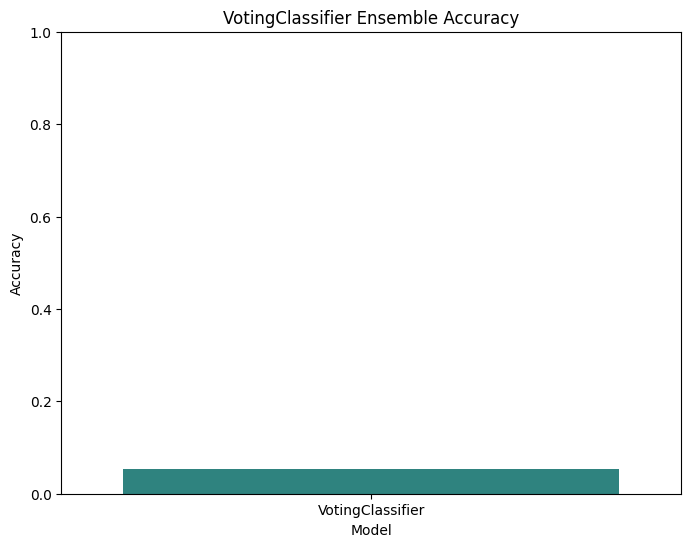

<Figure size 600x500 with 0 Axes>

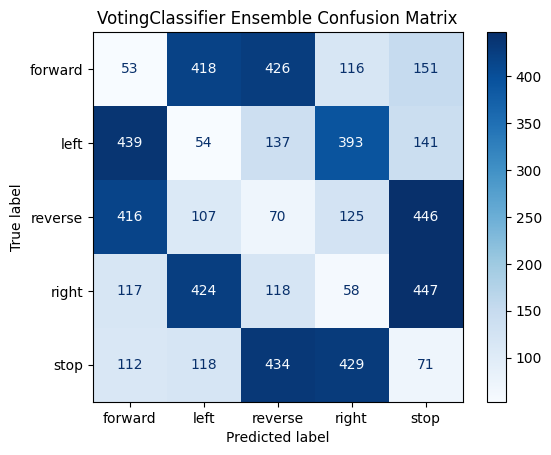

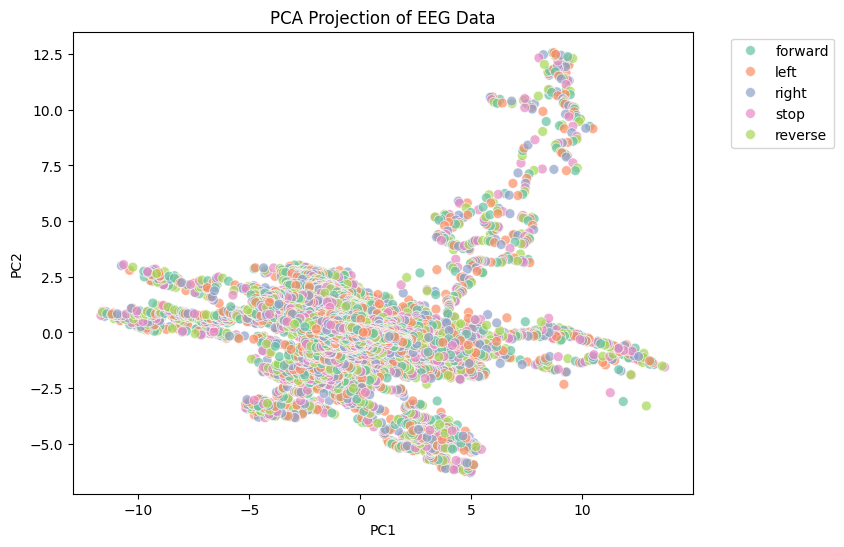

In [17]:
rf = RandomForestClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('svc', svc), ('lr', lr)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

y_pred_voting = voting_clf.predict(X_test)
acc_voting = accuracy_score(y_test, y_pred_voting)
print(f"\nVotingClassifier Ensemble Accuracy: {acc_voting:.2f}")
print(classification_report(y_test, y_pred_voting))

### VISUALIZATION
results = {
    "VotingClassifier": acc_voting
}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("VotingClassifier Ensemble Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()

cm = confusion_matrix(y_test, y_pred_voting, labels=np.unique(y))
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.title("VotingClassifier Ensemble Confusion Matrix")
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["label"] = y.reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="label", palette="Set2", s=50, alpha=0.7)
plt.title("PCA Projection of EEG Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()